       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

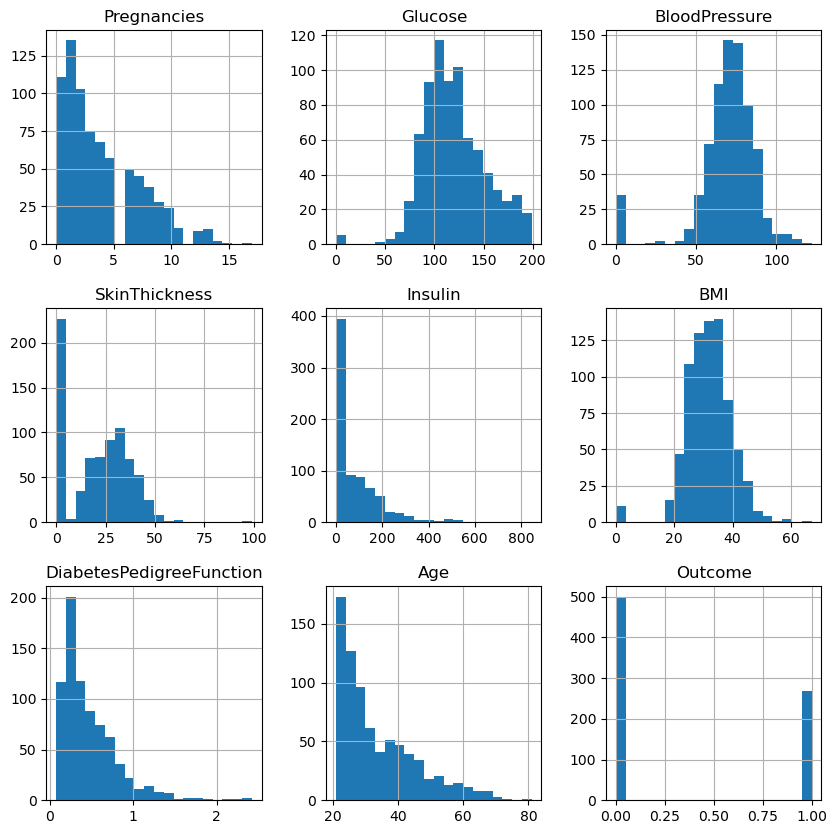

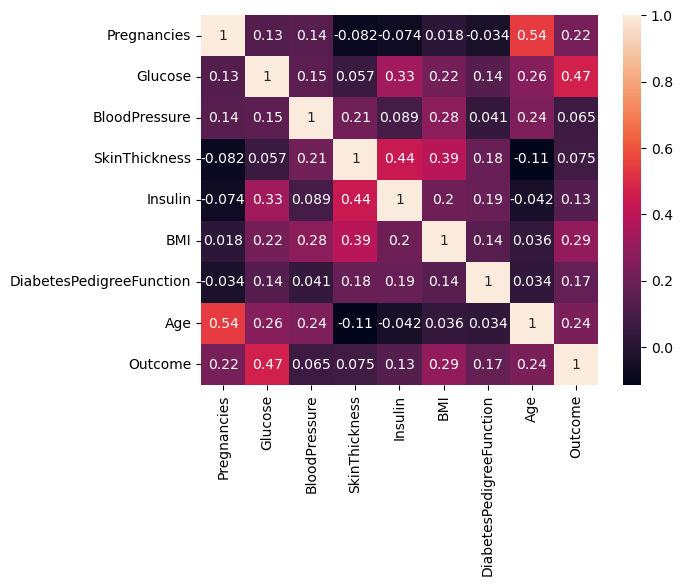

Cross-validation mean accuracy: 0.6711593375214162
Accuracy: 0.7265625
Precision: 0.5142857142857142
Recall: 0.5
F1 Score: 0.5070422535211268
Confusion Matrix:
[[75 17]
 [18 18]]


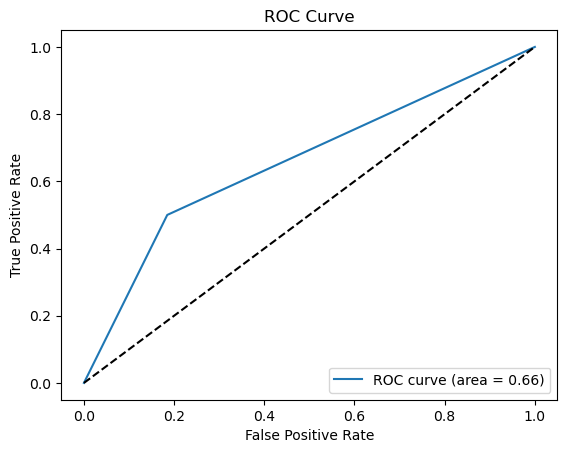

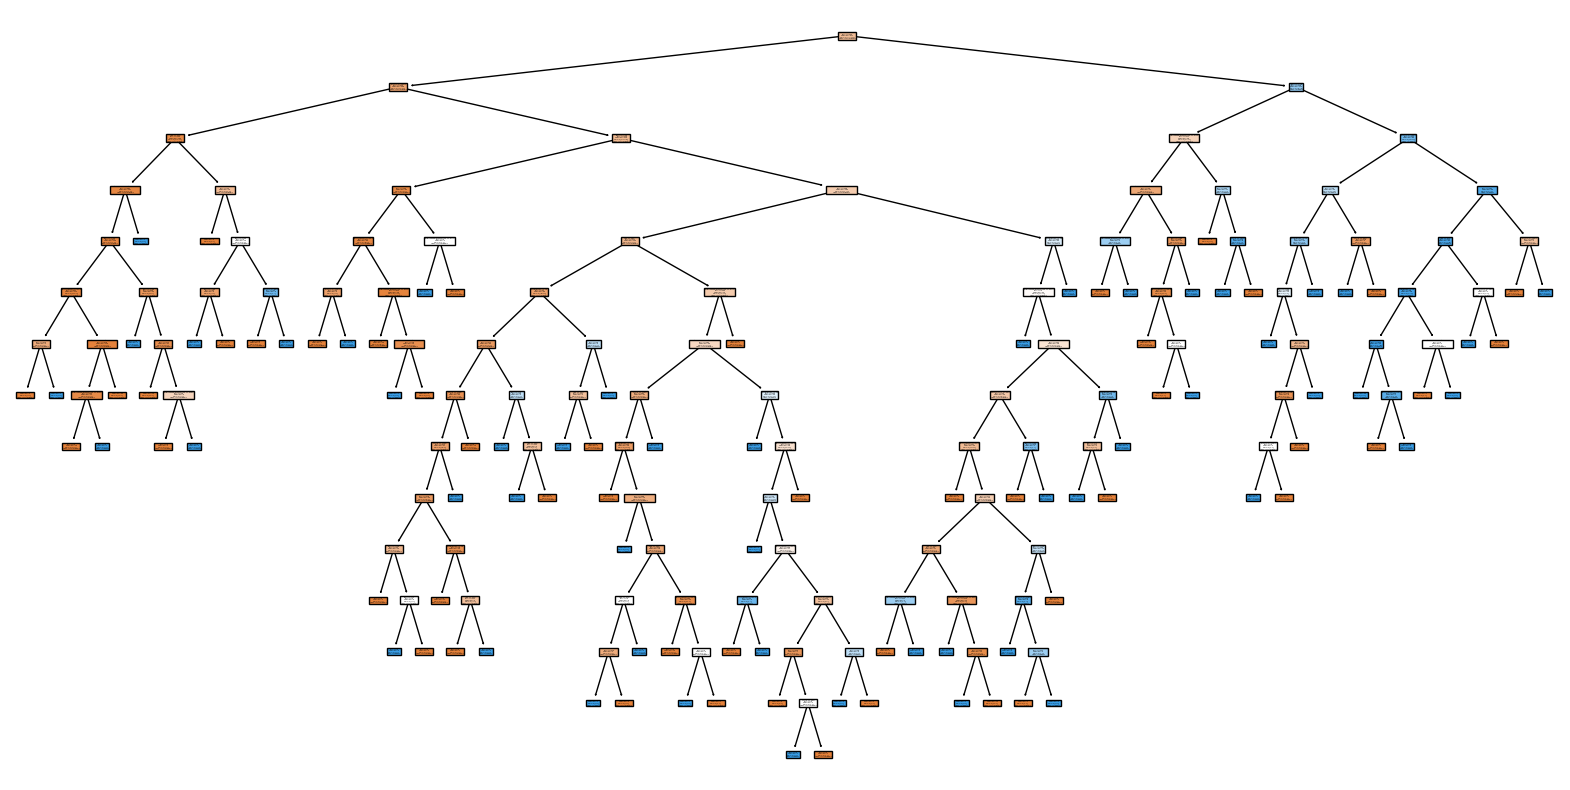

Feature Importances:
Glucose                     0.290415
BMI                         0.195789
DiabetesPedigreeFunction    0.156003
Age                         0.092367
Pregnancies                 0.086109
Insulin                     0.078240
BloodPressure               0.062716
SkinThickness               0.038361
dtype: float64


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 9 features, but DecisionTreeClassifier is expecting 8 features as input.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

# Step 1: Import the dataset
df = pd.read_csv('diabetes.csv')

# Step 2: Examine the variables using descriptive statistics and visualizations
print(df.describe())

# Histograms for each variable
df.hist(bins=20, figsize=(10, 10))
plt.show()

# Correlation matrix heatmap
sns.heatmap(df.corr(), annot=True)
plt.show()

# Step 3: Preprocess the data
# Handling missing values
df = df.fillna(df.median())

# Removing outliers using the IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Step 4: Split the dataset into a training set and a test set
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train a decision tree model and use cross-validation
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train, cv=5)
print(f'Cross-validation mean accuracy: {scores.mean()}')

# Step 6: Evaluate the performance on the test set
y_pred = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')

cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Step 7: Interpret the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=['Non-Diabetic', 'Diabetic'], filled=True)
plt.show()

feature_importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(f'Feature Importances:\n{feature_importances}')

# Step 8: Validate the decision tree model with new data (example)
# Assuming new_data is a DataFrame containing new samples
# new_predictions = clf.predict(new_data)

# Sensitivity analysis for one feature (Glucose)
sensitivity_test = np.linspace(X['Glucose'].min(), X['Glucose'].max(), 100).reshape(-1, 1)
# Adjust this line to fit your model input requirements
sensitivity_test_full = np.hstack((np.tile(X_train.median().values, (sensitivity_test.shape[0], 1)), sensitivity_test))
sensitivity_test_full[:, X.columns.get_loc('Glucose')] = sensitivity_test[:, 0]
predictions = clf.predict(sensitivity_test_full)
plt.plot(sensitivity_test, predictions)
plt.xlabel('Glucose')
plt.ylabel('Prediction')
plt.title('Sensitivity Analysis for Glucose')
plt.show()
